In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from dataprep.eda import plot as plot_eda

from eda_utils import DataTransform, DataFrameInfo, DataFrameVisualize, DataFrameTransform

In [15]:
data_transform = DataTransform()
dataframe_transform = DataFrameTransform()
data_plot = DataFrameVisualize()
dataframe_info = DataFrameInfo()

In [16]:
df = pd.read_csv('data/cleaned_data.csv')

In [17]:
df.head()

,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
0,f9dcbd09-32ac-41d9-a0b1-fdb2793378cf,Treehouses,Red Kite Tree Tent - Ynys Affalon,Escape to one of these two fabulous Tree Tents...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2.0,1.0,1.0,105.0,4.6,4.7,4.3,5.0,4.3,4.3,13,https://www.airbnb.co.uk/rooms/26620994?adults...,1.0,NaN
1,1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd,Treehouses,Az Alom Cabin - Treehouse Tree to Nature Cabin,Come and spend a romantic stay with a couple o...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3.0,3.0,0.0,92.0,4.3,4.7,4.6,4.9,4.7,4.5,8,https://www.airbnb.co.uk/rooms/27055498?adults...,1.0,NaN
2,d577bc30-2222-4bef-a35e-a9825642aec4,Treehouses,Cabane Entre Les Pins\r\n🌲🏕️🌲,"Rustic cabin between the pines, 3 meters high ...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4.0,2.0,1.5,52.0,4.2,4.6,4.8,4.8,4.8,4.7,51,https://www.airbnb.co.uk/rooms/51427108?adults...,1.0,NaN
3,ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc,Treehouses,Tree Top Cabin with log burner & private hot tub,The Tree top cabin is situated in our peaceful...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2.0,1.0,1.0,132.0,4.8,4.9,4.9,4.9,5.0,4.6,23,https://www.airbnb.co.uk/rooms/49543851?adults...,1.0,NaN
4,cfe479b9-c8f8-44af-9bc6-46ede9f14bb5,Treehouses,Treehouse near Paris Disney,"Charming cabin nestled in the leaves, real unu...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4.0,3.0,1.0,143.0,5.0,4.9,5.0,4.7,5.0,4.7,32,https://www.airbnb.co.uk/rooms/935398?adults=1...,2.0,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    830 non-null    object 
 1   Category              830 non-null    object 
 2   Title                 830 non-null    object 
 3   Description           830 non-null    object 
 4   Amenities             830 non-null    object 
 5   Location              830 non-null    object 
 6   guests                830 non-null    float64
 7   beds                  830 non-null    float64
 8   bathrooms             830 non-null    float64
 9   Price_Night           830 non-null    float64
 10  Cleanliness_rating    830 non-null    float64
 11  Accuracy_rating       830 non-null    float64
 12  Communication_rating  830 non-null    float64
 13  Location_rating       830 non-null    float64
 14  Check-in_rating       830 non-null    float64
 15  Value_rating          8

In [19]:
df = df.drop(columns=['Unnamed: 19'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    830 non-null    object 
 1   Category              830 non-null    object 
 2   Title                 830 non-null    object 
 3   Description           830 non-null    object 
 4   Amenities             830 non-null    object 
 5   Location              830 non-null    object 
 6   guests                830 non-null    float64
 7   beds                  830 non-null    float64
 8   bathrooms             830 non-null    float64
 9   Price_Night           830 non-null    float64
 10  Cleanliness_rating    830 non-null    float64
 11  Accuracy_rating       830 non-null    float64
 12  Communication_rating  830 non-null    float64
 13  Location_rating       830 non-null    float64
 14  Check-in_rating       830 non-null    float64
 15  Value_rating          8

In [31]:
df.Category.value_counts()

Chalets                                                            192
Treehouses                                                         183
Amazing pools                                                      165
Offbeat                                                            165
Beachfront                                                         124
Amazing pools,Stunning Cotswolds Water Park, sleeps 6 with pool      1
Name: Category, dtype: int64

In [32]:
df['Category'] = df['Category'].str.replace(r'Amazing pools,Stunning Cotswolds Water Park, sleeps 6 with pool', 'Amazing pools', regex=True)


In [33]:
df.Category.value_counts()

Chalets          192
Treehouses       183
Amazing pools    166
Offbeat          165
Beachfront       124
Name: Category, dtype: int64

In [34]:
df_mod = pd.get_dummies(df, columns=['Category'])

In [35]:
df_mod.head()

,ID,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,...,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Category_Amazing pools,Category_Beachfront,Category_Chalets,Category_Offbeat,Category_Treehouses
0,f9dcbd09-32ac-41d9-a0b1-fdb2793378cf,Red Kite Tree Tent - Ynys Affalon,Escape to one of these two fabulous Tree Tents...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2.0,1.0,1.0,105.0,4.6,...,4.3,4.3,13,https://www.airbnb.co.uk/rooms/26620994?adults...,1.0,0,0,0,0,1
1,1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd,Az Alom Cabin - Treehouse Tree to Nature Cabin,Come and spend a romantic stay with a couple o...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3.0,3.0,0.0,92.0,4.3,...,4.7,4.5,8,https://www.airbnb.co.uk/rooms/27055498?adults...,1.0,0,0,0,0,1
2,d577bc30-2222-4bef-a35e-a9825642aec4,Cabane Entre Les Pins\r\n🌲🏕️🌲,"Rustic cabin between the pines, 3 meters high ...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4.0,2.0,1.5,52.0,4.2,...,4.8,4.7,51,https://www.airbnb.co.uk/rooms/51427108?adults...,1.0,0,0,0,0,1
3,ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc,Tree Top Cabin with log burner & private hot tub,The Tree top cabin is situated in our peaceful...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2.0,1.0,1.0,132.0,4.8,...,5.0,4.6,23,https://www.airbnb.co.uk/rooms/49543851?adults...,1.0,0,0,0,0,1
4,cfe479b9-c8f8-44af-9bc6-46ede9f14bb5,Treehouse near Paris Disney,"Charming cabin nestled in the leaves, real unu...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4.0,3.0,1.0,143.0,5.0,...,5.0,4.7,32,https://www.airbnb.co.uk/rooms/935398?adults=1...,2.0,0,0,0,0,1


In [21]:
data_df = df.select_dtypes(include=np.number)

In [22]:
data_df.skew()

guests                   1.906688
beds                     2.366461
bathrooms               28.209313
Price_Night              3.138172
Cleanliness_rating      -2.083596
Accuracy_rating         -2.390648
Communication_rating    -3.379084
Location_rating         -2.552192
Check-in_rating         -3.576619
Value_rating            28.171685
bedrooms                 2.415986
dtype: float64

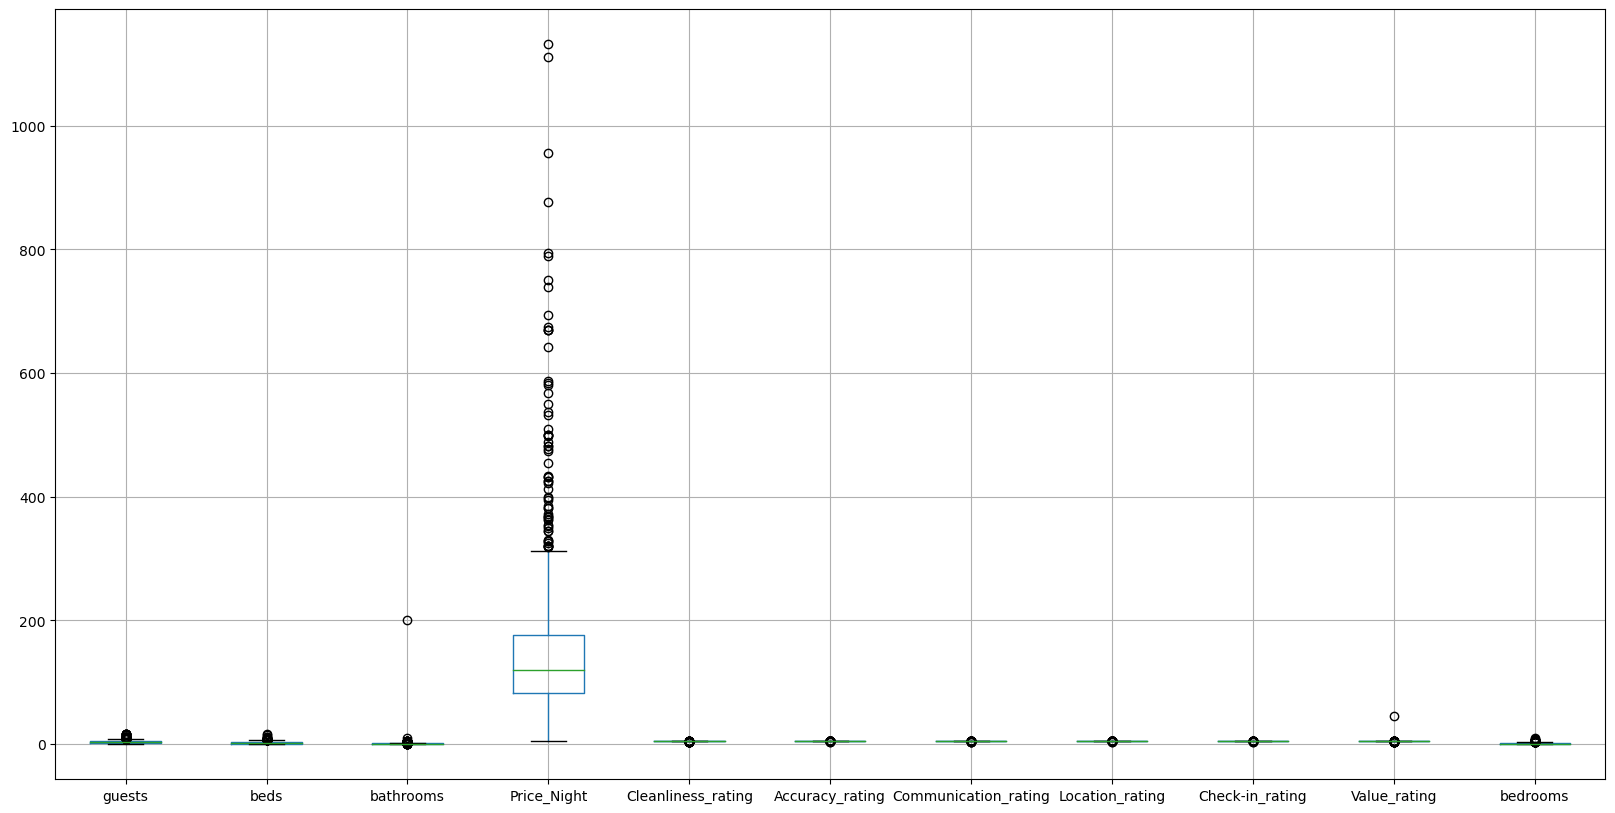

In [23]:
data_df.boxplot(figsize=(20, 10))
plt.show()

In [24]:
list_of_skewed_coluns = data_df.columns[data_df.skew() > 3].tolist()

In [25]:
list_of_skewed_coluns

['bathrooms', 'Price_Night', 'Value_rating']

In [26]:
for column in list_of_skewed_coluns:
    outliers = dataframe_info.calculate_iqr_outliers(data_df, column)
    data_df = data_df.drop(outliers.index)

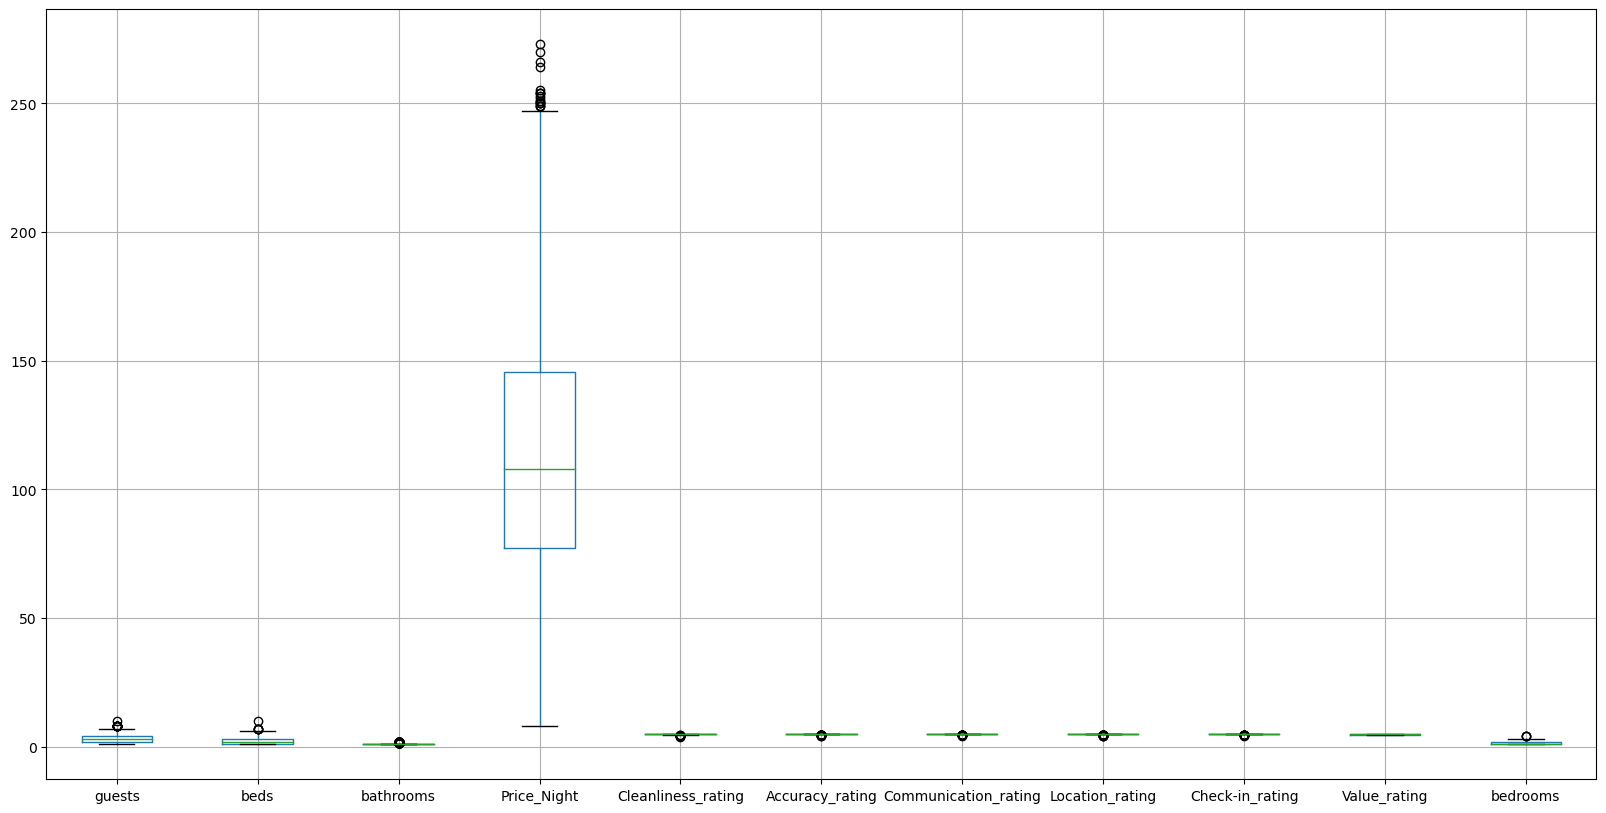

In [27]:
data_df.boxplot(figsize=(20, 10))
plt.show()


In [28]:
data_df.skew()

guests                  0.967350
beds                    1.567969
bathrooms               1.763730
Price_Night             0.657422
Cleanliness_rating     -2.150036
Accuracy_rating        -2.243025
Communication_rating   -2.678079
Location_rating        -2.067545
Check-in_rating        -2.596799
Value_rating           -0.740723
bedrooms                1.504477
dtype: float64

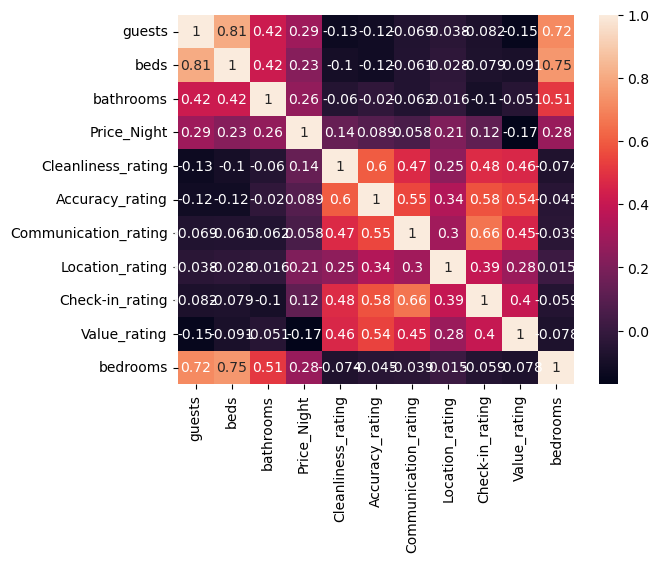

In [29]:
import seaborn as sns
corr_matrix = data_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [30]:
data_df["category"].value_counts()

KeyError: 'category'